In [2]:
using QuantumOptics
using PyPlot
using LinearAlgebra

Ncutoff = 10 #Maximum photon number 
Natoms = 10;

## start with the siplest case in which the system only interaction is with EM field

In [3]:
T = [0:10:800;];

b_fock = FockBasis(Natoms)
a = destroy(b_fock);
at = create(b_fock);
n = number(b_fock);

b_spin = SpinBasis(Natoms//2)
sm = sigmam(b_spin)
sp = sigmap(b_spin)
sz = sigmaz(b_spin)

s_square = sz^2 + sigmax(b_spin)^2 + sigmay(b_spin)^2

b = b_fock ⊗ b_spin;

ωc = 1 
ωa = 1
Ω = 0.04 / sqrt(Natoms)

# Hamiltonian
Hatom = ωa*sz/2
Hfield = ωc*n
Hint = Ω*(at⊗sm + a⊗sp)

Htot = one(b_fock)⊗Hatom + Hfield⊗one(b_spin) + Hint

Jtot = [0*one(b)]

Ψ0 = coherentstate(b_fock, 1) ⊗ spinup(b_spin);
ρ0 = Ψ0 ⊗ dagger(Ψ0);

tout, pt_master = timeevolution.master(T, ρ0, Htot, Jtot);

In [4]:
exp_n_master= real(expect(n ⊗ one(b_spin), pt_master));
exp_sz_master = real(expect(one(b_fock) ⊗ sz, pt_master));
exp_H_master = real(expect(Htot, pt_master));
exp_Jto2_master = real(expect(one(b_fock) ⊗ s_square, pt_master));

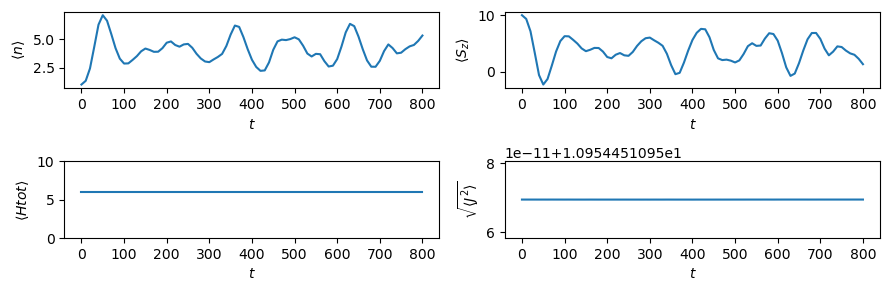

In [5]:
# Plot results
figure(figsize=(9, 3))
subplot(221)
# ylim([0, Ncutoff])
plot(T, exp_n_master);
xlabel(L" t")
ylabel(L"\langle n \rangle")

subplot(222)
# ylim([-Natoms, Natoms])
plot(T, exp_sz_master);
xlabel(L" t")
ylabel(L"\langle S_z \rangle")

subplot(223)
ylim([0, Natoms])
plot(T, exp_H_master);
xlabel(L" t")
ylabel(L"\langle Htot \rangle")

subplot(224)
# ylim([0, Natoms])
plot(T, exp_Jto2_master.^0.5);
xlabel(L" t")
ylabel(L"\sqrt{\langle J^2 \rangle}")

tight_layout()

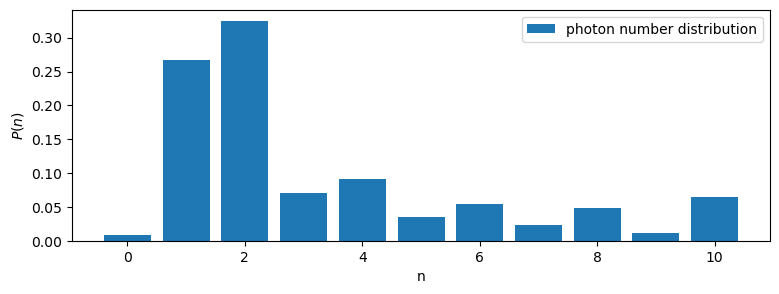

PyObject Text(26.000000000000007, 0.5, '$P(n)$')

In [6]:
# Photon number distribution
figure(figsize=(9,3))
ρ_end=ptrace(pt_master[10], 2)
N=[0:1:Ncutoff;]
p_n=real(diag(ρ_end.data))
bar(N, p_n, label="photon number distribution")
legend()
xlabel("n")
ylabel(L"P(n)")

In [19]:
tout = nothing
pt_master = nothing

## Now we will add dissappation procces for the emmited photons 
This will eliminate back-action from photons to the atomic state

In [31]:
T = [0:10:800;];
Ncutoff = 20

b_fock = FockBasis(Ncutoff)
a = destroy(b_fock);
at = create(b_fock);
n = number(b_fock);

b_spin = SpinBasis(Natoms//2)
sm = sigmam(b_spin)
sp = sigmap(b_spin)
sz = sigmaz(b_spin)

s_square = sz^2 + sigmax(b_spin)^2 + sigmay(b_spin)^2

b = b_fock ⊗ b_spin;

ωc = 1 
ωa = 1
Ω = 0.04 / sqrt(Natoms)

κ = 0.01 # Cavity leackage rate 

# Hamiltonian
Hatom = ωa*sz/2
Hfield = ωc*n
Hint = Ω*(at⊗sm + a⊗sp)

Htot = one(b_fock)⊗Hatom + Hfield⊗one(b_spin) + Hint

J_escape = [(sqrt(κ)*a)⊗one(b_spin)];

Jtot = J_escape

Ψ0 = coherentstate(b_fock, 0) ⊗ spinup(b_spin);
ρ0 = Ψ0 ⊗ dagger(Ψ0);

tout, pt_master = timeevolution.master(T, ρ0, Htot, Jtot);

In [33]:
exp_n_master= real(expect(n ⊗ one(b_spin), pt_master));
exp_sz_master = real(expect(one(b_fock) ⊗ sz, pt_master));
exp_H_master = real(expect(Htot, pt_master));
exp_Jto2_master = real(expect(one(b_fock) ⊗ s_square, pt_master));

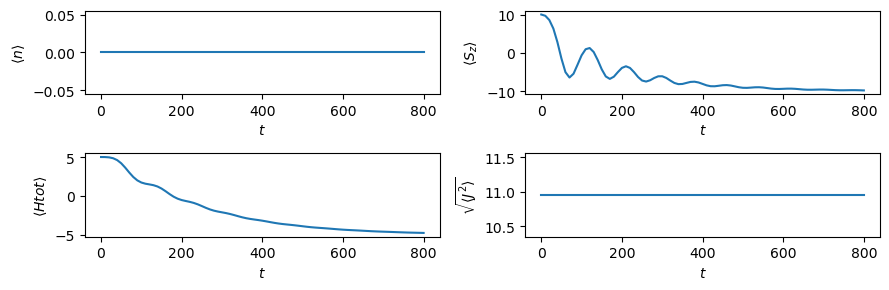

In [34]:
# Plot results
figure(figsize=(9, 3))
subplot(221)
# ylim([0, Ncutoff])
plot(T, exp_n_master);
xlabel(L" t")
ylabel(L"\langle n \rangle")

subplot(222)
# ylim([-Natoms, Natoms])
plot(T, exp_sz_master);
xlabel(L" t")
ylabel(L"\langle S_z \rangle")

subplot(223)
# ylim([0, Natoms])
plot(T, exp_H_master);
xlabel(L" t")
ylabel(L"\langle Htot \rangle")

subplot(224)
# ylim([0, Natoms])
plot(T, exp_Jto2_master.^0.5);
xlabel(L" t")
ylabel(L"\sqrt{\langle J^2 \rangle}")

tight_layout()

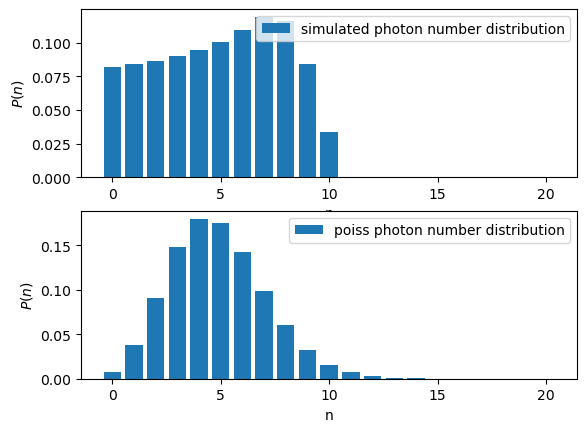

4.921343384427344

PyObject Text(34.875, 0.5, '$P(n)$')

In [15]:
# Photon number distribution
# figure(figsize=(9,3))
subplot(211)
ρ_end=ptrace(pt_master[6], 2)
N=[0:1:Ncutoff;]
p_n=real(diag(ρ_end.data))
bar(N, p_n, label="simulated photon number distribution")
legend()
xlabel("n")
ylabel(L"P(n)")

n_val = real(expect(n, ρ_end))
print(n_val)

Ψn = coherentstate(b_fock, n_val/2.23)
ρn = Ψn ⊗ dagger(Ψn);

subplot(212)
ρ_end=ρn
N=[0:1:Ncutoff;]
p_n=real(diag(ρ_end.data))
bar(N, p_n, label="poiss photon number distribution")
legend()
xlabel("n")
ylabel(L"P(n)")




# 

In [16]:
n_val = real(expect(n, ρ_end))
print( n_val)

4.870320159977854

In [18]:
tout = nothing
pt_master = nothing

# Let's add pupping term to the equation to look for the steady state

In [12]:
T = [0:10:800;];

b_fock = FockBasis(Ncutoff)
a = destroy(b_fock);
at = create(b_fock);
n = number(b_fock);

b_spin = SpinBasis(Natoms//2)
sm = sigmam(b_spin)
sp = sigmap(b_spin)
sz = sigmaz(b_spin)

s_square = sz^2 + sigmax(b_spin)^2 + sigmay(b_spin)^2

b = b_fock ⊗ b_spin;

ωc = 1 
ωa = 1
Ω = 0.04 / sqrt(Natoms)

κ = 0.4 # Cavity leackage rate 
Y = 0.4*Natoms*Natoms/2 # Pumping strength

# Hamiltonian
Hatom = ωa*sz/2
Hfield = ωc*n
Hint = Ω*(at ⊗ sm + a ⊗ sp)
H_drive =  Y*(a+at)

Htot = one(b_fock)⊗Hatom + Hfield ⊗ one(b_spin) + Hint +  H_drive ⊗ one(b_spin)

J_escape = [(sqrt(κ)*a) ⊗ one(b_spin)];

Jtot = J_escape

Ψ0 = fockstate(b_fock, 0) ⊗ spindown(b_spin);
ρ0 = Ψ0 ⊗ dagger(Ψ0);

tout, pt_master = timeevolution.master(T, ρ0, Htot, Jtot);

In [13]:
exp_n_master= real(expect(n ⊗ one(b_spin), pt_master));
exp_sz_master = real(expect(one(b_fock) ⊗ sz, pt_master));
exp_H_master = real(expect(Htot, pt_master));
exp_Jto2_master = real(expect(one(b_fock) ⊗ s_square, pt_master));

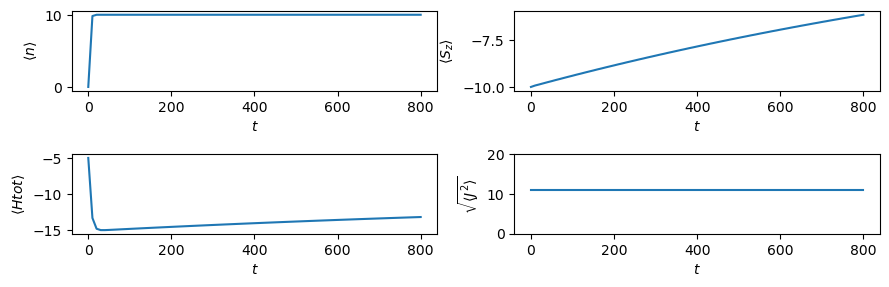

In [14]:
# Plot results
figure(figsize=(9, 3))
subplot(221)
# ylim([0, Ncutoff])
plot(T, exp_n_master);
xlabel(L" t")
ylabel(L"\langle n \rangle")

subplot(222)
# ylim([-Natoms, Natoms])
plot(T, exp_sz_master);
xlabel(L" t")
ylabel(L"\langle S_z \rangle")

subplot(223)
# ylim([0, Natoms])
plot(T, exp_H_master);
xlabel(L" t")
ylabel(L"\langle Htot \rangle")

subplot(224)
ylim([0, Natoms*2])
plot(T, exp_Jto2_master.^0.5);
xlabel(L" t")
ylabel(L"\sqrt{\langle J^2 \rangle}")

tight_layout()

In [ ]:
tout, pt_master = steadystate.master(Htot, Jtot);